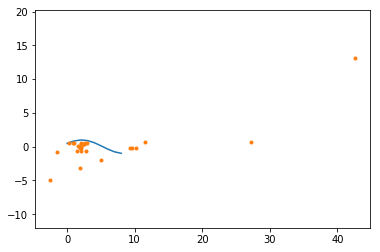

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

damp = 1 

x = np.arange(1,10)
coast = np.sin(0.02*x)#定义海岸线离散点集
coast = np.sin(0.5*x)#定义海岸线离散点集
#coast = x**2
tan = (coast[1:]-coast[:-1])/(x[1:]-x[:-1]+1e-16)

#该如何定义水的流向
#若仅考虑较小的一段，考虑为单射函数，则
#后续版本可以考虑中心差分
vx = 0.5*x**2
vx = vx#构造x方向的水速
vy = vx**2#构造y方向的水速

#截取至方便计算
vx = vx[:-1]
vy = vy[:-1]

v = (vx**2+vy**2)**0.5#算出合速度大小
theta_w1 = np.arctan(vy/(vx+1e-16))
theta_c = np.arctan(tan)
theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角
theta_w2 = theta_temp+theta_c-0.5*np.pi#与横轴的夹角
v_2 = v*damp#damp为与河岸交换速度过程中的作用系数

crossx = np.zeros((theta_w2.size,theta_w2.size))
crossy = crossx.copy()
crossx_ls = []
crossy_ls = []
for i in range(theta_w2.size):
    theta_1 = theta_w2[i]
    for j in range(i+1,theta_w2.size):
        theta_2 = theta_w2[j]
        #x3 = (x[i]*np.tan(theta_1)-x[j]*np.tan(theta_2))/(np.tan(theta_1)-np.tan(theta_2))
        x3 = (coast[i]-coast[j]-np.tan(theta_1)*x[i]+np.tan(theta_2)*x[j])/(np.tan(theta_2)-np.tan(theta_1))
        y3 = coast[j]+(x3-x[j])*np.tan(theta_2)#到这一步得到了交点公式
        crossx[i][j] = x3 
        crossy[i][j] = y3 
        crossx_ls.append(x3)
        crossy_ls.append(y3)
plt.plot(coast)
plt.plot(crossx_ls,crossy_ls,'.')
plt.axis('equal')
plt.show()

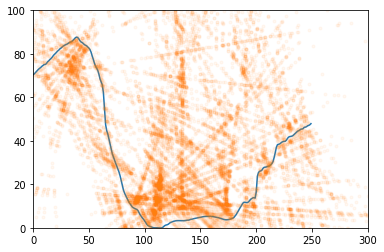

In [23]:
# -*- coding: utf-8 -*-

import numpy as np 
from matplotlib import pyplot as plt 

def get_value(site,site1):
    return np.argmin(np.abs(site-site1))

damp = 1 

x = np.arange(1,10)
coast = np.sin(0.02*x)#定义海岸线离散点集
coast = np.sin(0.5*x)#定义海岸线离散点集
data_temp = np.load('xy.npz')
x,y = data_temp
x = data_temp[x]
coast = data_temp[y]
oast = x**2
tan = (coast[1:]-coast[:-1])/(x[1:]-x[:-1]+1e-16)

#该如何定义水的流向
#若仅考虑较小的一段，考虑为单射函数，则
#后续版本可以考虑中心差分
vx = 0.5*x**2
vx = -vx#构造x方向的水速
vy = -np.abs(vx)#构造y方向的水速

#截取至方便计算
vx = vx[:-1]
vy = vy[:-1]

v = (vx**2+vy**2)**0.5#算出合速度大小
theta_w1 = np.arctan(vy/(vx+1e-16))#水与横轴的夹角正切
theta_c = np.arctan(tan)
theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角
theta_w2 = theta_temp+theta_c-0.5*np.pi#反射角与横轴的夹角
v_2 = v*damp#damp为与河岸交换速度过程中的作用系数

crossx = np.zeros((theta_w2.size,theta_w2.size))
crossy = crossx.copy()
crossx_ls = []
crossy_ls = []
trash_m = []
for i in range(theta_w2.size):
    theta_1 = theta_w2[i]
    for j in range(i+1,theta_w2.size):
        theta_2 = theta_w2[j]
        #x3 = (x[i]*np.tan(theta_1)-x[j]*np.tan(theta_2))/(np.tan(theta_1)-np.tan(theta_2))
        x3 = (coast[i]-coast[j]-np.tan(theta_1)*x[i]+np.tan(theta_2)*x[j])/(np.tan(theta_2)-np.tan(theta_1))
        y3 = coast[j]+(x3-x[j])*np.tan(theta_2)#到这一步得到了交点公式
        crossx[i][j] = x3 
        crossy[i][j] = y3 
        vec_x3 = np.array((x3,y3))
        vec_x2 = np.array((x[j],coast[j]))
        vec_x32 = vec_x2-vec_x3
        #if np.dot(vec_x32,np.array((np.cos(theta_w2[j]),np.sin(theta_w2[j]))))>0:
        #    continue
        trash_m.append(v[i]+v[j])#水的输送量，但是水速越快，垃圾越不容易留下来
        crossx_ls.append(x3)
        crossy_ls.append(y3)
#这套算法似乎没有明显错误
#没办法，考虑旧的水流的话能裂开，没法构建出合理的模型，或者说damp取值为多少没法得到
#而且很容易把考虑的计算的点扩展到整个二维平面上
plt.plot(x,coast)
plt.plot(crossx_ls,crossy_ls,'.',alpha = 0.05);plt.xlim(0,300);plt.ylim(0,100)#plt.xlim(0,300);plt.ylim(0,100)
#plt.axis('equal')
# =============================================================================
# 好象不如直接拿去给matlab做线性插值
# #绘制浓度分布，相当于提供了一个权重
# a = np.arange(min(crossx_ls),max(crossx_ls)+1)#对应于x轴
# b = np.arange(min(crossy_ls),max(crossy_ls)+1)#对应于y轴
# A,B = np.meshgrid(a,b)
# M = np.zeros(A.shape)
# for i in range(len(trash_m)):
#     M[b==crossy_ls[get_value(b[i],crossy_ls)],a==crossx_ls[i]]=trash_m[i]
# plt.contourf(A,B,M)
# =============================================================================
plt.show()

$\psi$

# 2020.8.11

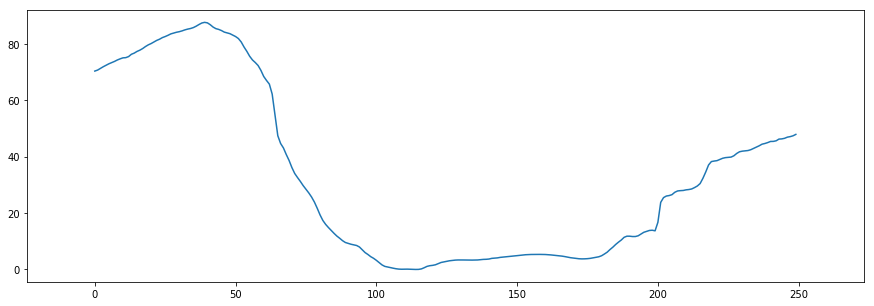

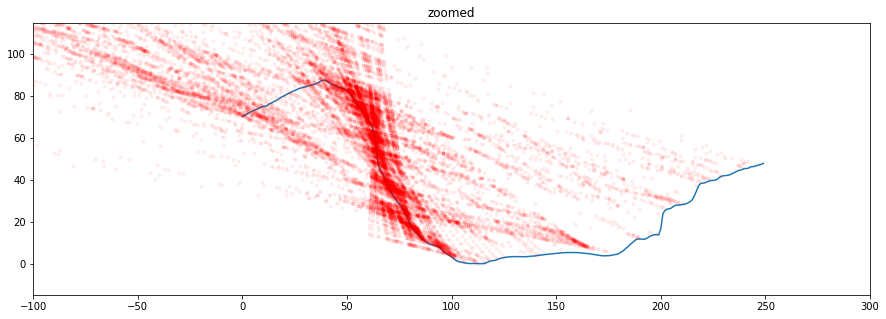

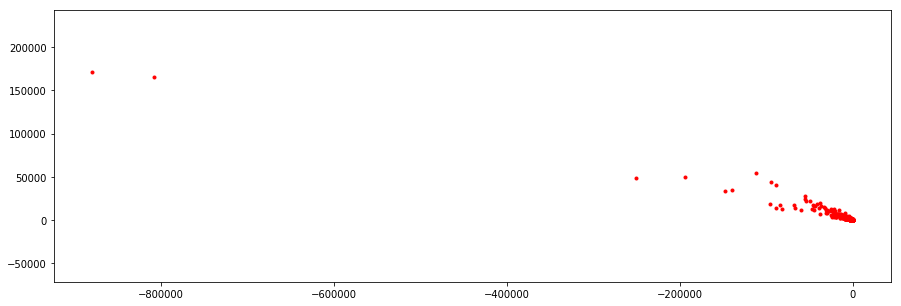

In [27]:
# -*- coding: utf-8 -*-
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 
def get_value(site,site1):
    return np.argmin(np.abs(site-site1))

def norm_v(v1_temp):
    '''单位化'''
    return v1_temp/np.sqrt((v1_temp**2).sum())

damp = 1 

#x = np.arange(1,10)
#coast = np.sin(0.02*x)#定义海岸线离散点集
#coast = np.sin(0.5*x)#定义海岸线离散点集
data_temp = np.load('xy.npz')
x,y = data_temp
x = data_temp[x]
coast = data_temp[y]
#x = np.arange(10)
#coast = np.sin(0.5*x)
#coast = x**2
tan = (coast[1:]-coast[:-1])/(x[1:]-x[:-1]+1e-16)#海岸线切线正切值（无问题）

#该如何定义水的流向
#若仅考虑较小的一段，考虑为单射函数，则
#后续版本可以考虑中心差分
#vx = 0.5*x**2+1#避免第一个点是0，先如是考虑
#vx = vx#构造x方向的水速
#vy = vx**2#构造y方向的水速
#vy = -np.abs(vx)
vx = -np.ones(x.shape)
vy = vx
#截取至方便计算
vx = vx[:-1]
vy = vy[:-1]

v = (vx**2+vy**2)**0.5#算出合速度大小
theta_w1 = np.arctan(vy/(vx+1e-16))#水与横轴的夹角
minus_pi_site = np.where((np.array(vx)<0) & (np.array(vy)<0))
theta_w1[minus_pi_site] -= np.pi
plus_pi_site = np.where((np.array(vx)<0) & (np.array(vy)>0))
theta_w1[plus_pi_site] += np.pi
    
theta_c = np.arctan(tan)#海岸线与横轴的夹角
theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角#即使在sin与45°水流例子中依然成立（theta_c-theta_w)<0+0.5pi....result>0
#theta_w2 = theta_temp+theta_c-0.5*np.pi#反射角与横轴的夹角
#theta_w2 = np.abs(theta_temp)+np.abs(theta_c)-0.5*np.pi#这里得到的只能是正值，对于部分负值的情况，仍然需要寻找条件

theta_c = np.arctan(tan)
v1 = np.array((np.cos(theta_c),np.sin(theta_c))).T
v2 = np.array((np.cos(theta_c+0.5*np.pi),np.sin(theta_c+0.5*np.pi))).T
v3 = np.array((vx,vy)).T
theta_13 = []
for i in range(v3.shape[0]):
    theta_13_t=np.arccos(np.dot(v1[i],v3[i])/np.sqrt((v1[i]**2).sum()+(v3[i]**2).sum()))
    theta_13.append(theta_13_t)
    v1_temp=-v1[i]#v1反方向向量
    v1_temp=v1_temp/np.sqrt((v1_temp**2).sum()) #v1_temp是v1反向量的单位化
    v2_temp = norm_v(v2[i])#v2单位化
    v3_temp=v3[i]/np.sqrt((v3[i]**2).sum())#v3单位化
    if (v1[i][0]>=0 and v1[i][1]>=0):
        #if(v3[i][0]<=0 and v3[i][1]>=0):#   =是否能取到，何时取到，先凭感觉的，都取并没有影响
        if -1<=v3_temp[0]<=v2_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
        if -1<=v3_temp[0]<=v1_temp[0] and v3_temp[1]<=0:
            theta_w2 = theta_c[i]-theta_13
        if v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]<=0:
            theta_w2 = theta_c[i]+theta_13
        if -v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]>=0:
            theta_w2 = theta_c[i]+theta_13
        if v2_temp[0]<=v3_temp[0]<=-v1_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
    if v1[i][0]>=0 and v1[i][1]<=0:
        if -1<=v3_temp[0]<=-v1_temp[0] and v3_temp[1]<=0:
            theta_w2 = theta_c[i]+theta_13
        if -1<=v3_temp[0]<=v1_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]+theta_13
        if v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
        if -v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]<=0:
            theta_w2 = theta_c[i]-theta_13
    #else:
    #    print('请输入正确的v3水流方向!')#zhuanye14,ban9-->ban11
#theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角#即使在sin与45°水流例子中依然成立（theta_c-theta_w)<0+0.5pi....result>0
#theta_w2 = theta_temp+theta_c-0.5*np.pi#反射角与横轴的夹角


#theta_w2 = np.abs(theta_temp)+np.abs(theta_c)-0.5*np.pi#这里得到的只能是正值，对于部分负值的情况，仍然需要寻找条件
v_2 = v*damp#damp为与河岸交换速度过程中的作用系数

crossx = np.zeros((theta_w2.size,theta_w2.size))
crossy = crossx.copy()
crossx_ls = []
crossy_ls = []
trash_m = []
for i in range(theta_w2.size):
    theta_1 = theta_w2[i]
    for j in range(i+1,theta_w2.size):
        theta_2 = theta_w2[j]
        #x3 = (x[i]*np.tan(theta_1)-x[j]*np.tan(theta_2))/(np.tan(theta_1)-np.tan(theta_2))
        x3 = (coast[i]-coast[j]-np.tan(theta_1)*x[i]+np.tan(theta_2)*x[j])/(np.tan(theta_2)-np.tan(theta_1))
        y3 = coast[j]+(x3-x[j])*np.tan(theta_2)#到这一步得到了交点公式
        crossx[i][j] = x3 
        crossy[i][j] = y3 
        vec_x3 = np.array((x3,y3))
        vec_x2 = np.array((x[j],coast[j]))
        vec_x32 = vec_x2-vec_x3
        if np.dot(vec_x32,np.array((np.cos(theta_w2[j]),np.sin(theta_w2[j]))))>0:
            continue
        trash_m.append(v[i]+v[j])#水的输送量，但是水速越快，垃圾越不容易留下来
        crossx_ls.append(x3)
        crossy_ls.append(y3)
#这套算法似乎没有明显错误
#没办法，考虑旧的水流的话能裂开，没法构建出合理的模型，或者说damp取值为多少没法得到
#而且很容易把考虑的计算的点扩展到整个二维平面上

###########################################
#计算反射线（确为反射线的前提：反射线的过滤条件无误
#考虑计算切线，对于给定x_0,y_0,有(y-y_0)/(x-x_0)=tan(theta)
# ====> y=tan(theta)(x-x_0)+y_0
#红色的球是交点
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.axis('equal')
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.plot(crossx_ls,crossy_ls,'r.',alpha = 0.05);#plt.xlim(0,300);plt.ylim(0,100)#plt.xlim(0,300);plt.ylim(0,100)
plt.axis('equal')
plt.ylim(0,100)
plt.xlim(-100,300)
plt.title('zoomed')
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.plot(crossx_ls,crossy_ls,'r.')#,alpha = 0.5);#plt.xlim(0,300);plt.ylim(0,100)#plt.xlim(0,300);plt.ylim(0,100)
plt.axis('equal')
# =============================================================================
if False:#绘图开关
    for i in range(len(x)):#range(10,250,20):
        for j in range(i,len(x)-1):#range(i,250,20):
            fig = plt.figure(figsize = (15,5))
            ax = fig.add_subplot(131)
            plt.plot(x,coast)
            plt.plot(x[i],coast[i],'bo',markersize = 10)
            plt.plot(x[j],coast[j],'bo',markersize = 10)#起点
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)#交点
            plt.axis('equal')
            plt.axis('equal')
            ax = fig.add_subplot(132)
            ax.plot(x,coast)
            ax.plot([x[i],crossx[i][j]],[coast[i],crossy[i][j]],'b',markersize = 10);plt.xlim(x[i]-3,x[i]+3);plt.ylim(coast[i]-1,coast[i]+1)
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)
            #计算切线
            x_tan = np.arange(x[i]-3,x[i]+4)
            y_tan = tan[i]*(x_tan-x[i])+coast[i]
            plt.plot(x_tan,y_tan,'--')
            ax.axis('equal')
            ax = fig.add_subplot(133)
            plt.plot(x,coast)
            plt.plot([x[j],crossx[i][j]],[coast[j],crossy[i][j]],'b',markersize = 10);plt.xlim(x[j]-3,x[j]+3);plt.ylim(coast[j]-1,coast[j]+1)
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)
            #计算切线
            x_tan = np.arange(x[j]-3,x[j]+4)
            y_tan = tan[j]*(x_tan-x[j])+coast[j]
            plt.plot(x_tan,y_tan,'--')
            ax.axis('equal')
            plt.pause(0.5)
plt.show()
# =============================================================================
# =============================================================================
# 好象不如直接拿去给matlab做线性插值
# #绘制浓度分布，相当于提供了一个权重
# a = np.arange(min(crossx_ls),max(crossx_ls)+1)#对应于x轴
# b = np.arange(min(crossy_ls),max(crossy_ls)+1)#对应于y轴
# A,B = np.meshgrid(a,b)
# M = np.zeros(A.shape)
# for i in range(len(trash_m)):
#     M[b==crossy_ls[get_value(b[i],crossy_ls)],a==crossx_ls[i]]=trash_m[i]
# plt.contourf(A,B,M)
# =============================================================================
plt.show()







# 需要对交点到两个起点的连线的中间点是否进入了陆地做判断

# 2020 08 25
所以两个起点与交点的连线都要计算是否存在，计算斜率后，计算中间可以存在的点，并横纵坐标都取int

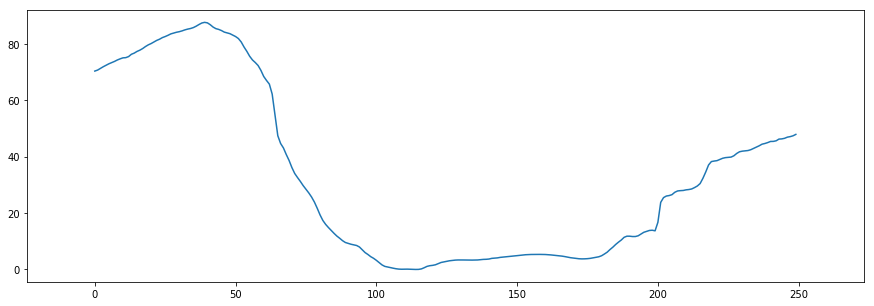

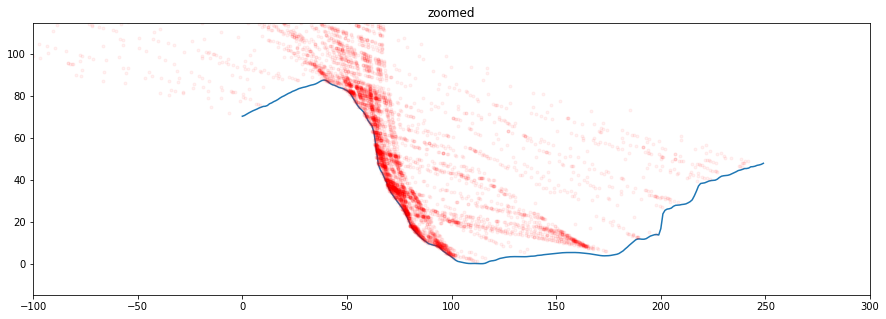

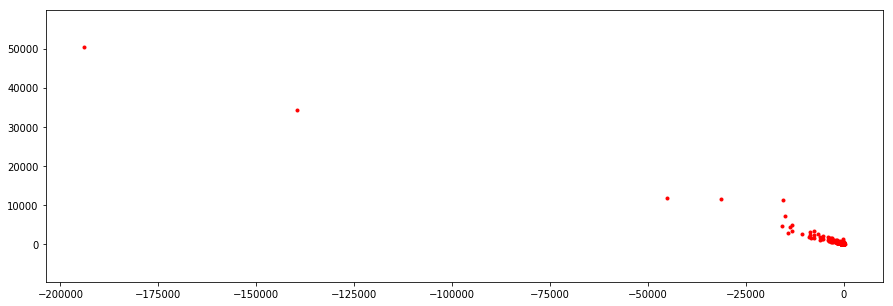

In [79]:
# -*- coding: utf-8 -*-
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 
def get_value(site,site1):
    return np.argmin(np.abs(site-site1))

def norm_v(v1_temp):
    '''单位化'''
    return v1_temp/np.sqrt((v1_temp**2).sum())

def interp_for_under_coast(x_i,coast_i,x3,y3):
    range_31 = sorted([x_i,x3])
    range_31 = np.arange(np.ceil(range_31[0]),np.floor(range_31[1]))
    x_interp_31 = np.array([x_i,x3])
    y_interp_31 = np.array([coast_i,y3])
    y_interp_31 = y_interp_31[np.argsort(x_interp_31)]
    x_interp_31 = x_interp_31[np.argsort(x_interp_31)]
    interp_31 = np.interp(range_31,x_interp_31,y_interp_31)
    return range_31,interp_31

damp = 1 

#x = np.arange(1,10)
#coast = np.sin(0.02*x)#定义海岸线离散点集
#coast = np.sin(0.5*x)#定义海岸线离散点集
data_temp = np.load('xy.npz')
x,y = data_temp
x = data_temp[x]
coast = data_temp[y]
#x = np.arange(10)
#coast = np.sin(0.5*x)
#coast = x**2
tan = (coast[1:]-coast[:-1])/(x[1:]-x[:-1]+1e-16)#海岸线切线正切值（无问题）

#该如何定义水的流向
#若仅考虑较小的一段，考虑为单射函数，则
#后续版本可以考虑中心差分
#vx = 0.5*x**2+1#避免第一个点是0，先如是考虑
#vx = vx#构造x方向的水速
#vy = vx**2#构造y方向的水速
#vy = -np.abs(vx)
vx = -np.ones(x.shape)
vy = vx
#截取至方便计算
vx = vx[:-1]
vy = vy[:-1]

v = (vx**2+vy**2)**0.5#算出合速度大小
theta_w1 = np.arctan(vy/(vx+1e-16))#水与横轴的夹角
minus_pi_site = np.where((np.array(vx)<0) & (np.array(vy)<0))
theta_w1[minus_pi_site] -= np.pi
plus_pi_site = np.where((np.array(vx)<0) & (np.array(vy)>0))
theta_w1[plus_pi_site] += np.pi
    
theta_c = np.arctan(tan)#海岸线与横轴的夹角
theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角#即使在sin与45°水流例子中依然成立（theta_c-theta_w)<0+0.5pi....result>0
#theta_w2 = theta_temp+theta_c-0.5*np.pi#反射角与横轴的夹角
#theta_w2 = np.abs(theta_temp)+np.abs(theta_c)-0.5*np.pi#这里得到的只能是正值，对于部分负值的情况，仍然需要寻找条件

theta_c = np.arctan(tan)
v1 = np.array((np.cos(theta_c),np.sin(theta_c))).T
v2 = np.array((np.cos(theta_c+0.5*np.pi),np.sin(theta_c+0.5*np.pi))).T
v3 = np.array((vx,vy)).T
theta_13 = []
for i in range(v3.shape[0]):
    theta_13_t=np.arccos(np.dot(v1[i],v3[i])/np.sqrt((v1[i]**2).sum()+(v3[i]**2).sum()))
    theta_13.append(theta_13_t)
    v1_temp=-v1[i]#v1反方向向量
    v1_temp=v1_temp/np.sqrt((v1_temp**2).sum()) #v1_temp是v1反向量的单位化
    v2_temp = norm_v(v2[i])#v2单位化
    v3_temp=v3[i]/np.sqrt((v3[i]**2).sum())#v3单位化
    if (v1[i][0]>=0 and v1[i][1]>=0):
        #if(v3[i][0]<=0 and v3[i][1]>=0):#   =是否能取到，何时取到，先凭感觉的，都取并没有影响
        if -1<=v3_temp[0]<=v2_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
        if -1<=v3_temp[0]<=v1_temp[0] and v3_temp[1]<=0:
            theta_w2 = theta_c[i]-theta_13
        if v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]<=0:
            theta_w2 = theta_c[i]+theta_13
        if -v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]>=0:
            theta_w2 = theta_c[i]+theta_13
        if v2_temp[0]<=v3_temp[0]<=-v1_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
    if v1[i][0]>=0 and v1[i][1]<=0:
        if -1<=v3_temp[0]<=-v1_temp[0] and v3_temp[1]<=0:
            theta_w2 = theta_c[i]+theta_13
        if -1<=v3_temp[0]<=v1_temp[0] and v3_temp[1]>=0:
            theta_w2 = theta_c[i]+theta_13
        if v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]>=0:
            theta_w2 = theta_c[i]-theta_13
        if -v1_temp[0]<=v3_temp[0]<=1 and v3_temp[1]<=0:
            theta_w2 = theta_c[i]-theta_13
    #else:
    #    print('请输入正确的v3水流方向!')#zhuanye14,ban9-->ban11
#theta_temp = 0.25*np.pi+theta_c-theta_w1#反射角#即使在sin与45°水流例子中依然成立（theta_c-theta_w)<0+0.5pi....result>0
#theta_w2 = theta_temp+theta_c-0.5*np.pi#反射角与横轴的夹角


#theta_w2 = np.abs(theta_temp)+np.abs(theta_c)-0.5*np.pi#这里得到的只能是正值，对于部分负值的情况，仍然需要寻找条件
v_2 = v*damp#damp为与河岸交换速度过程中的作用系数

crossx = np.zeros((theta_w2.size,theta_w2.size))
crossy = crossx.copy()
crossx_ls = []
crossy_ls = []
trash_m = []
for i in range(theta_w2.size):
    theta_1 = theta_w2[i]
    for j in range(i+1,theta_w2.size):
        theta_2 = theta_w2[j]
        #x3 = (x[i]*np.tan(theta_1)-x[j]*np.tan(theta_2))/(np.tan(theta_1)-np.tan(theta_2))
        x3 = (coast[i]-coast[j]-np.tan(theta_1)*x[i]+np.tan(theta_2)*x[j])/(np.tan(theta_2)-np.tan(theta_1))
        y3 = coast[j]+(x3-x[j])*np.tan(theta_2)#到这一步得到了交点公式
        crossx[i][j] = x3 
        crossy[i][j] = y3 
        vec_x3 = np.array((x3,y3))
        vec_x2 = np.array((x[j],coast[j]))
        vec_x32 = vec_x2-vec_x3
        if np.dot(vec_x32,np.array((np.cos(theta_w2[j]),np.sin(theta_w2[j]))))>0:
            continue
            
        '''以下将计算起点与交点连线'''
        #range_31 = sorted([x[i],x3])
        #range_31 = np.arange(np.ceil(range_31[0]),np.floor(range_31[1]))
        #x_interp_31 = np.array([x[i],x3])
        #y_interp_31 = np.array([coast[i],y3])
        #y_interp_31 = y_interp_31[np.argsort(x_interp_31)]
        #x_interp_31 = x_interp_31[np.argsort(x_interp_31)]
        #interp_31 = np.interp(range_31,x_interp_31,y_interp_31)
        range_31,interp_31 = interp_for_under_coast(x[i],coast[i],x3,y3)
        range_32,interp_32 = interp_for_under_coast(x[j],coast[j],x3,y3)
        #plt.plot(range_32,interp_32)
        '''存在的bug：交点超出海岸线的坐标范围'''
        site_31_temp = np.where((range_31>=x.min())&(range_31<=x.max()))[0]
        site_32_temp = np.where((range_32>=x.min())&(range_32<=x.max()))[0]
        if site_31_temp.size == 0 :
            bool_under_coast_31 = 0 
        else:
            interp_31 = interp_31[site_31_temp]
            range_31 = range_31[site_31_temp]
            coast_range_31 = coast[np.where((x>=range_31.min())&(x<=range_31.max()))]
            bool_under_coast_31 = (interp_31<coast_range_31).any()#修正，不能用any()
        if site_32_temp.size == 0 :
            #print(site_32_temp)
            bool_under_coast_32 = 0 
        else:
            interp_32 = interp_32[np.where((range_32>=x.min())&(range_32<=x.max()))]
            range_32 = range_32[np.where((range_32>=x.min())&(range_32<=x.max()))]
            coast_range_32 = coast[np.where((x>=range_32.min())&(x<=range_32.max()))]
            bool_under_coast_32 = (interp_32<coast_range_32).any()
            #print(bool_under_coast_32)
        #break
        if bool_under_coast_31 or bool_under_coast_32 :
            continue
        
        trash_m.append(v[i]+v[j])#水的输送量，但是水速越快，垃圾越不容易留下来
        crossx_ls.append(x3)
        crossy_ls.append(y3)
#这套算法似乎没有明显错误
#没办法，考虑旧的水流的话能裂开，没法构建出合理的模型，或者说damp取值为多少没法得到
#而且很容易把考虑的计算的点扩展到整个二维平面上

###########################################
#计算反射线（确为反射线的前提：反射线的过滤条件无误
#考虑计算切线，对于给定x_0,y_0,有(y-y_0)/(x-x_0)=tan(theta)
# ====> y=tan(theta)(x-x_0)+y_0
#红色的球是交点
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.axis('equal')
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.plot(crossx_ls,crossy_ls,'r.',alpha = 0.05);#plt.xlim(0,300);plt.ylim(0,100)#plt.xlim(0,300);plt.ylim(0,100)
plt.axis('equal')
plt.ylim(0,100)
plt.xlim(-100,300)
plt.title('zoomed')
plt.figure(figsize = (15,5))
plt.plot(x,coast)
plt.plot(crossx_ls,crossy_ls,'r.')#,alpha = 0.5);#plt.xlim(0,300);plt.ylim(0,100)#plt.xlim(0,300);plt.ylim(0,100)
plt.axis('equal')
# =============================================================================
if False:#绘图开关
    for i in range(len(x)):#range(10,250,20):
        for j in range(i,len(x)-1):#range(i,250,20):
            fig = plt.figure(figsize = (15,5))
            ax = fig.add_subplot(131)
            plt.plot(x,coast)
            plt.plot(x[i],coast[i],'bo',markersize = 10)
            plt.plot(x[j],coast[j],'bo',markersize = 10)#起点
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)#交点
            plt.axis('equal')
            plt.axis('equal')
            ax = fig.add_subplot(132)
            ax.plot(x,coast)
            ax.plot([x[i],crossx[i][j]],[coast[i],crossy[i][j]],'b',markersize = 10);plt.xlim(x[i]-3,x[i]+3);plt.ylim(coast[i]-1,coast[i]+1)
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)
            #计算切线
            x_tan = np.arange(x[i]-3,x[i]+4)
            y_tan = tan[i]*(x_tan-x[i])+coast[i]
            plt.plot(x_tan,y_tan,'--')
            ax.axis('equal')
            ax = fig.add_subplot(133)
            plt.plot(x,coast)
            plt.plot([x[j],crossx[i][j]],[coast[j],crossy[i][j]],'b',markersize = 10);plt.xlim(x[j]-3,x[j]+3);plt.ylim(coast[j]-1,coast[j]+1)
            plt.plot(crossx[i][j],crossy[i][j],'ro',markersize = 10)
            #计算切线
            x_tan = np.arange(x[j]-3,x[j]+4)
            y_tan = tan[j]*(x_tan-x[j])+coast[j]
            plt.plot(x_tan,y_tan,'--')
            ax.axis('equal')
            plt.pause(0.5)
plt.show()
# =============================================================================
# =============================================================================
# 好象不如直接拿去给matlab做线性插值
# #绘制浓度分布，相当于提供了一个权重
# a = np.arange(min(crossx_ls),max(crossx_ls)+1)#对应于x轴
# b = np.arange(min(crossy_ls),max(crossy_ls)+1)#对应于y轴
# A,B = np.meshgrid(a,b)
# M = np.zeros(A.shape)
# for i in range(len(trash_m)):
#     M[b==crossy_ls[get_value(b[i],crossy_ls)],a==crossx_ls[i]]=trash_m[i]
# plt.contourf(A,B,M)
# =============================================================================
plt.show()



In [66]:
coast_range_32

array([45.62169608, 46.22335016, 46.29582422, 46.50514447, 46.91765537,
       47.10284902])

In [67]:
interp_32

array([48.7430525 , 48.51835311, 48.29365371, 48.06895432, 47.84425493,
       47.61955553])

In [73]:
np.interp([2,3],[1,5],[4,8])

array([5., 6.])

In [27]:
range_31 = sorted([x[i],x3])
range_31 = np.arange(np.ceil(range_31[0]),np.floor(range_31[1]))
x_interp_31 = np.array([x[i],x3])
y_interp_31 = np.array([coast[i],y3])
y_interp_31 = y_interp_31[np.argsort(x_interp_31)]
x_interp_31 = x_interp_31[np.argsort(x_interp_31)]
interp_31 = np.interp(range_31,x_interp_31,y_interp_31)

interp_31

array([48.7430525 , 48.51835311, 48.29365371, 48.06895432, 47.84425493,
       47.61955553])

In [76]:
a = [2,3,1]
np.argsort(a)
np.array(a)[np.argsort(a)]

array([1, 2, 3])

In [77]:
coast

array([ 7.03840423e+01,  7.07377612e+01,  7.13280840e+01,  7.19254268e+01,
        7.24309981e+01,  7.29686954e+01,  7.33793988e+01,  7.38119201e+01,
        7.43226228e+01,  7.47293723e+01,  7.50806624e+01,  7.51539718e+01,
        7.55301117e+01,  7.63503100e+01,  7.67624638e+01,  7.73635566e+01,
        7.78069791e+01,  7.83820585e+01,  7.90941180e+01,  7.96973062e+01,
        8.01545810e+01,  8.07411209e+01,  8.12832739e+01,  8.17043853e+01,
        8.22705447e+01,  8.26466120e+01,  8.30876687e+01,  8.35884418e+01,
        8.38903921e+01,  8.41674491e+01,  8.43720071e+01,  8.46599152e+01,
        8.50165736e+01,  8.52909376e+01,  8.55025594e+01,  8.58265114e+01,
        8.63212914e+01,  8.69178076e+01,  8.74498551e+01,  8.76882799e+01,
        8.75094488e+01,  8.68566009e+01,  8.60231269e+01,  8.54562088e+01,
        8.51837810e+01,  8.47696454e+01,  8.42236594e+01,  8.39289436e+01,
        8.36672195e+01,  8.31390743e+01,  8.26498137e+01,  8.19404810e+01,
        8.07186132e+01,  